In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

In [2]:
#df = pd.read_csv("../processed_data/data_cleaned_Carmen/")

In [19]:
df = pd.read_csv("../processed_data/cleaned_data_final.csv")

In [20]:
df.head()

,name,male,origin,isMarried,isNoble,popularity,isAlive,season,episode,deaths,episode_num
0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,0,8,The Bells,Lord Varys - Burned alive by Drogon with his f...,71
1,Walder Frey,1,House Frey,1,1,0.896321,0,6,The Winds of Winter,Lord Walder Frey - Throat slit by Arya Stark w...,60
2,Addison Hill,1,House Lannister,0,1,0.267559,1,0,NaN,NaN,0
3,Aemma Arryn,0,House Arryn,1,1,0.183946,0,5,The Gift,Maester Aemon Targaryen - Died of natural causes.,47
4,Sylva Santagar,0,House Martell,1,1,0.043478,1,0,NaN,NaN,0


In [5]:
X = df
X = X.drop(columns = ["Unnamed: 0","name",'isAlive'], axis=1)

In [6]:
X.head()

,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,episode_global_num
0,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,NaN
1,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,60.0
2,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,NaN
3,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,NaN
4,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,NaN


In [7]:
y = df["isAlive"]
y = y.to_frame(name="isAlive")
y.head()

,isAlive
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [16]:
num_transformer = Pipeline([('robust_scaler', RobustScaler())])

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
""
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ["numDeadRelations","popularity"]),
    ('cat_transformer', cat_transformer, ['origin'])
])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
            columns=preprocessor.get_feature_names_out())

In [11]:
#X_train = X_train.drop(['house'], axis=1)
#X_test = X_test.drop(['house'], axis =1)

In [12]:
#scaler = RobustScaler()
#X_train[["numDeadRelations","popularity"]] = scaler.fit_transform(X_train[["numDeadRelations","popularity"]])
#X_test[["numDeadRelations","popularity"]] = scaler.transform(X_test[["numDeadRelations","popularity"]])

In [14]:
#X_train = X_train.drop(columns = ["origin"], axis=1)

In [15]:
model = LogisticRegression()
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring="f1")
test = cv_results["test_score"].mean()
test

0.8527285495403474

In [44]:
grid = {'l1_ratio': [0.2, 0.5, 0.8]}

search = GridSearchCV(
    model,
    grid, 
    scoring = 'f1',
    cv = 5,
    n_jobs=-1)

search.fit(X_train, y_train)

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used wh

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': [0.2, 0.5, 0.8]}, scoring='f1')

In [45]:
# Best score
print(search.best_score_)

# Best Params
search.best_params_

# Best estimator
search.best_estimator_

0.8527285495403474


LogisticRegression(l1_ratio=0.2)

In [46]:
grid = {'l1_ratio': stats.uniform(0, 1)}

search = RandomizedSearchCV(
    model,
    grid, 
    scoring='accuracy',
    n_iter=100,
    cv=5, n_jobs=-1
)

search.fit(X_train, y_train)
search.best_estimator_
print(search.best_score_)

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used wh

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed w

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils

/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils

0.7606442577030813


/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/jyahyong/.pyenv/versions/3.10.6/envs/game-of-thrones-survival/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used wh

In [47]:
X = pd.DataFrame(preprocessor.fit_transform(X),
            columns=preprocessor.get_feature_names_out())

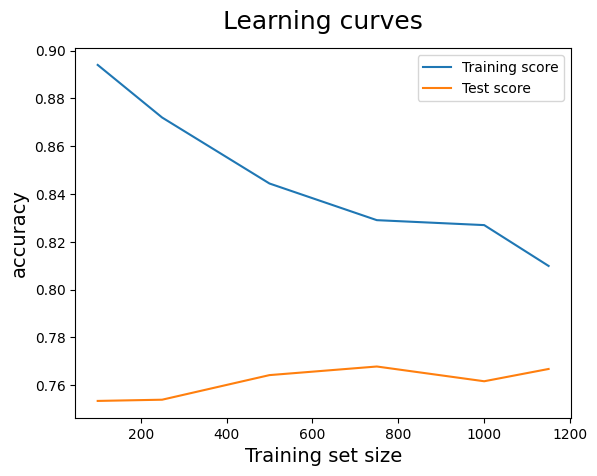

In [48]:
train_sizes = [25,50,75,100,250,500,750,1000,1150]

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# franzi testing

In [25]:
data = df.drop(columns=['name', 'season', 'episode', 'deaths', 'episode_num'])

In [26]:
data

,male,origin,isMarried,isNoble,popularity,isAlive
0,1,House Targaryen,0,0,0.605351,0
1,1,House Frey,1,1,0.896321,0
2,1,House Lannister,0,1,0.267559,1
3,0,House Arryn,1,1,0.183946,0
4,0,House Martell,1,1,0.043478,1
...,...,...,...,...,...,...
1944,1,House Stark,0,0,0.351171,0
1945,1,House Bolton,0,0,0.096990,0
1946,1,Dothraki,0,0,0.030100,1
1947,1,Peasant,0,0,0.130435,1


In [28]:
X = data.drop(columns='isAlive')
y = data['isAlive']

In [49]:
num_transformer = Pipeline([('robust_scaler', RobustScaler())])

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['isMarried', 'isNoble', 'popularity']),
    ('cat_transformer', cat_transformer, ['origin'])
])

pipe = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced'))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['isMarried', 'isNoble',
                                                   'popularity']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['origin'])])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [52]:
y_pred = pipe.predict(X_test)

In [53]:
pd.DataFrame(y_test)

,isAlive
1614,1
1405,1
974,0
1055,1
307,1
...,...
1743,0
1548,0
1007,1
1272,0


In [54]:
correct_predictions = (y_pred == pd.DataFrame(y_test)['isAlive']).sum()
correct_predictions

403

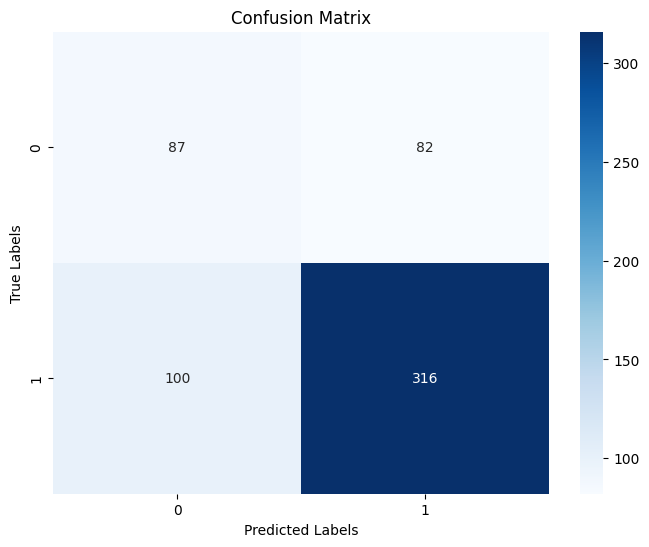

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [56]:
TN, FP, FN, TP = cm.ravel()

print(TN/(TN+FP) * 100)
print(TP/(TP+FN) * 100)

51.4792899408284
75.96153846153845


In [57]:
pipe.score(X_test, y_test)

0.6888888888888889